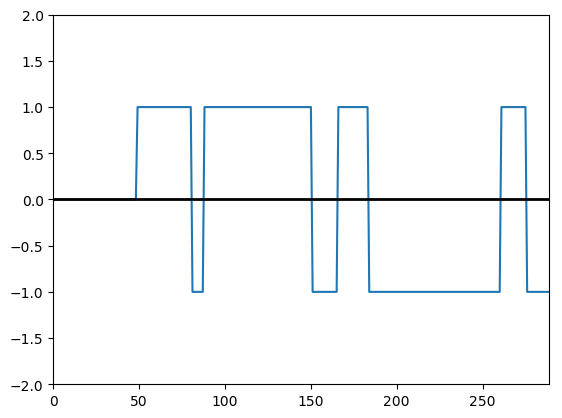

In [90]:
chart["Regime"] = np.where(chart['20-50'] > 0, 1, 0)
chart["Regime"] = np.where(chart['20-50'] < 0, -1, chart["Regime"])
chart["Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)

In [91]:
%matplotlib inline

In [92]:
chart["Regime"].value_counts()

 1    128
-1    113
 0     49
Name: Regime, dtype: int64

In [93]:
chart['signal'] = 0

In [94]:
chart['rcopy'] = chart['Regime'].shift(1)

In [95]:
chart['signal'] = chart['Regime'] - chart['rcopy']

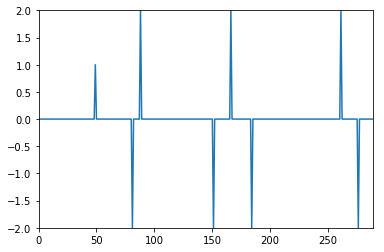

In [96]:
chart["signal"].plot(ylim = (-2, 2))

In [97]:
chart['signal'].value_counts()

 0.0    281
-2.0      4
 2.0      3
 1.0      1
Name: signal, dtype: int64

In [98]:
chart.loc[chart["signal"] > 0, "close"]

49     318.599651
88     321.000000
166    339.990070
261    325.000000
Name: close, dtype: float64

In [99]:
chart.loc[chart["signal"] < 0, "close"]

81     321.875581
151    335.000000
184    326.100000
276    316.999000
Name: close, dtype: float64

In [100]:
eth_signals = pd.concat([
        pd.DataFrame({"Price": chart.loc[chart["signal"] > 0, "close"],
                     "Regime": chart.loc[chart["signal"] > 0, "Regime"],
                     "Signal": "Sell"}),
        pd.DataFrame({"Price": chart.loc[chart["signal"] < 0, "close"],
                     "Regime": chart.loc[chart["signal"] < 0, "Regime"],
                     "Signal": "Buy"}),
    ])
eth_signals.sort_index(inplace = True)
eth_signals

,Price,Regime,Signal
49,318.599651,1,Sell
81,321.875581,-1,Buy
88,321.000000,1,Sell
151,335.000000,-1,Buy
166,339.990070,1,Sell
184,326.100000,-1,Buy
261,325.000000,1,Sell
276,316.999000,-1,Buy


In [101]:
eth_profits = pd.DataFrame({
        "Buy": eth_signals.loc[eth_signals["Signal"] == "Buy", "Price"],
        "Sell": eth_signals.loc[eth_signals["Signal"] == "Sell", "Price"],
})
eth_profits

,Buy,Sell
49,NaN,318.599651
81,321.875581,NaN
88,NaN,321.000000
151,335.000000,NaN
166,NaN,339.990070
184,326.100000,NaN
261,NaN,325.000000
276,316.999000,NaN


In [102]:
eth_profits['Buy'] = eth_profits['Buy'].shift(1)

In [104]:
taker= 0.9975
maker = 0.9985
eth_profits['Buy'] = eth_profits['Buy'] * taker
eth_profits['Sell'] = eth_profits['Sell'] * maker *taker
eth_profits['Profit'] = eth_profits['Sell'] - eth_profits['Buy']
eth_profits

,Buy,Sell,Profit
49,NaN,317.326447,NaN
81,NaN,NaN,NaN
88,321.070892,319.717204,-1.353688
151,NaN,NaN,NaN
166,334.162500,338.631385,4.468885
184,NaN,NaN,NaN
261,325.284750,323.701219,-1.583531
276,NaN,NaN,NaN


In [105]:
eth_profits['Profit'].sum()

1.5316651151180736

C:\Users\annadume\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1504569215
1504547615
10 day MA: 305.76
20 day MA: 303.38


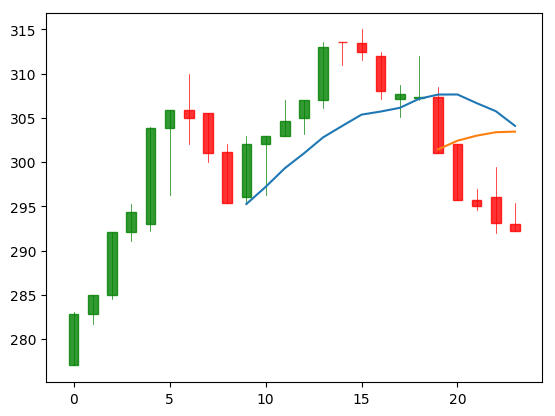

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import dates, ticker
import matplotlib as mpl
from matplotlib.finance import candlestick_ohlc
import time
mpl.style.use('default')

m = 60
h = m * 60
d = h * 24

now = int(time.time())
print(now)
s = now - 6 * h
print(s)
a = 'USDT_ETH'
e = '9999999999'
p = '900'
js = 'https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%s&end=%s&period=%s' % (a, s, e, p)
eth = pd.read_json(js)

date = eth.index
open = eth['open'].tolist()
high = eth['high'].tolist()
low = eth['low'].tolist()
close = eth['close'].tolist()

ohlc = list(zip(date, open, high, low, close))

fig = plt.subplot()
ax1 = plt.subplot()
candlestick_ohlc(ax1, ohlc, width=0.5, colorup='g', colordown='r', alpha=0.8)

eth["5d"] = np.round(eth["weightedAverage"].rolling(window = 5, center = False).mean(), 2)
eth["10d"] = np.round(eth["weightedAverage"].rolling(window = 10, center = False).mean(), 2)
eth["20d"] = np.round(eth["weightedAverage"].rolling(window = 20, center = False).mean(), 2)
#eth["30d"] = np.round(eth["weightedAverage"].rolling(window = 30, center = False).mean(), 2)
#eth["60d"] = np.round(eth["weightedAverage"].rolling(window = 60, center = False).mean(), 2)



day10 = eth['10d'].tolist()[-2]
day20 = eth['20d'].tolist()[-2]
print('10 day MA:', day10)
print('20 day MA:', day20)



#plt.plot(date, eth["5d"])
plt.plot(date, eth["10d"])
plt.plot(date, eth["20d"])
#plt.plot(date, eth['weightedAverage'])



plt.show()
